# **BANK CUSTOMER CHURN PREDICTION**
![Photo by <a href="https://unsplash.com/@clemono?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Clem Onojeghuo</a> on <a href="https://unsplash.com/s/photos/churn?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  ](https://images.unsplash.com/photo-1465125159090-b104362936e1?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1190&q=80)
> Image credits: Clem Onojeghuo from Unsplash

Churn prediction models have become a very important asset in determining the customer behaviour for a company. The churn rate drives decision making and makes the company analyse itself and the way they provide its services to the customer. Churn prediction consists of detecting which customers are likely to cancel a subscription to a service based on how they use the service. As it is more costlier to get new customers than to keep the old ones, Churn models have become very necessary.
<br/>
For a bank, predicting the churn rate is to determine which customers are closing their bank accounts and what factors are leading to their decisions. A Churn Prediction Model might be useful in this case to predict way before a person might close their account. The factors leading to customer churn are also very important to analyse closely and make important decisions in changing or modifying the current workings of the company or a service provider.

>To create a churn model I have selected the `churn-modelling` dataset. The dataset consists of various information on the customers and a target column called `'Exited'` that tells whether they have closed their bank accounts. Let's start!

# Contents:
1. <a href='#imports'>Imports</a>
2. <a href='#dataanalysis'>Data Analysis</a>
   1. <a href='#datareading'>Data Reading</a>
   2. <a href='#datacleaning'>Data Cleaning</a>
   3. <a href='#datawrangling'>Data Wrangling with EDA</a>
3. <a href='#modeltraining'>Model Training</a>
   1. <a href='#lrmodel'>Training a Logistic Regression model as a base model</a>
   2. <a href='#xgboost'>Training on XG-Boost</a>
   3. <a href='#hyperparam'>Hyperparameter tuning for XG-Boost</a>
4. <a href='#results'>Results</a>

# 1. <a id='imports'>Imports</a>
### Let us start by importing our usual libraries.

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/churn-modelling/Churn_Modelling.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, plot_roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score, RepeatedStratifiedKFold

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from numpy import mean

import warnings
warnings.filterwarnings('ignore')

seed = 46

# 2. <a id='dataanalysis'>Data Analysis</a>
### We will start by analysing the data. First we will read the dataset and see for any missing values using pandas. Then we will go through the dataset and replace all the values which are not in the right format.

## 2.1. <a id='datareading'>Data Reading</a>

In [3]:
data = pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')

In [4]:
len(data)

10000

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


>#### Creating a copy so that we can revert back to the original dataset whenever necessary.

In [7]:
df = data.copy()

## 2.2. <a id='datacleaning'>Data Cleaning</a>
### Let's first see if the target classes have equal number of entries or not.

In [8]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<a id="imb"></a>

In [9]:
print('Class imbalance percentage: {}%'.format(len(df[df['Exited']==1])/(len(df[df['Exited']==0]))*100))

Class imbalance percentage: 25.580811252040686%


> #### The class 0 has around 6000 more values than the class 1 making this dataset skewed and the classes imbalanced.

In [10]:
print(df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [11]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

>#### No missing values found so we move on to the next step.

## 2.3. <a id='datawrangling'>Data Wrangling with EDA</a>
### Here, we will conduct some Exploratory Data Analysis to determine which features are necessary and which are just useless. We will also convert categorical features into numerical ones to make it easier for the model to understand our data.

> #### Features: CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary

> #### Target: Exited

#### Heatmap for our data:

<AxesSubplot:>

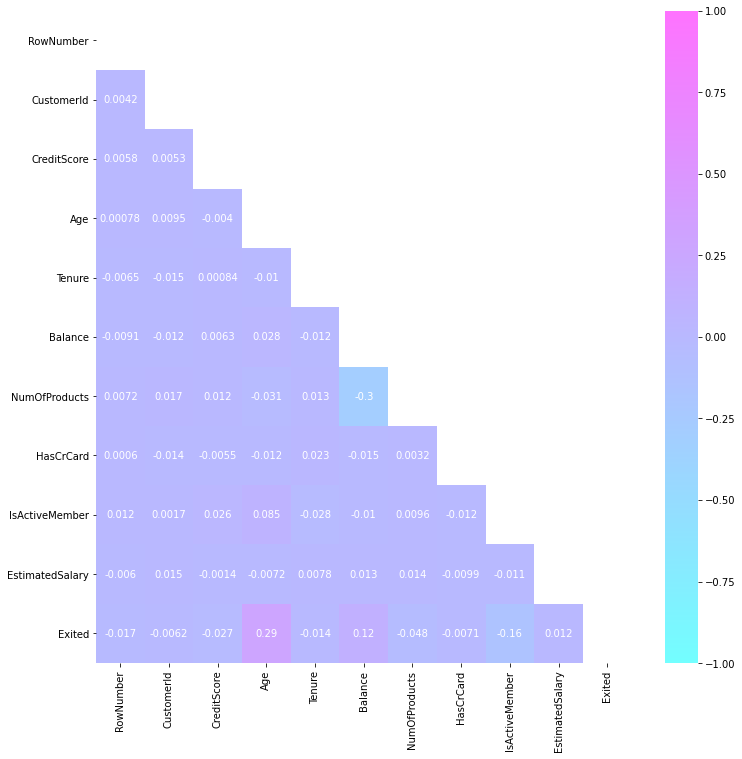

In [12]:
plt.figure(figsize=(12,12))
churn_corr = df.corr()
matrix = np.triu(churn_corr)
churn_corr_top = churn_corr.index
sns.heatmap(df[churn_corr_top].corr(), annot=True, vmin=1.0, vmax=-1.0, mask=matrix, cmap="cool", alpha=0.55)

#### Class Imbalance shown visually:

<AxesSubplot:xlabel='count', ylabel='Exited'>

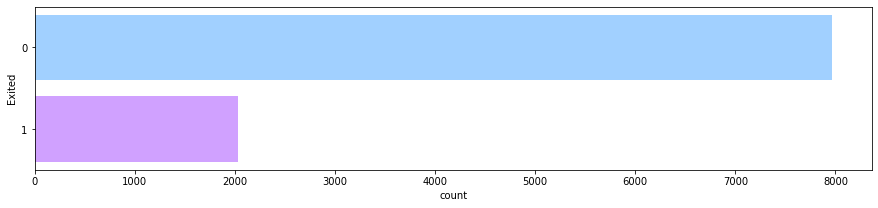

In [13]:
plt.figure(figsize=(15, 3))
sns.countplot(y=df['Exited'], data=df, palette="cool", alpha=0.55, saturation=1)

### `Credit Scores`:
#### Distribution plot for credit scores:

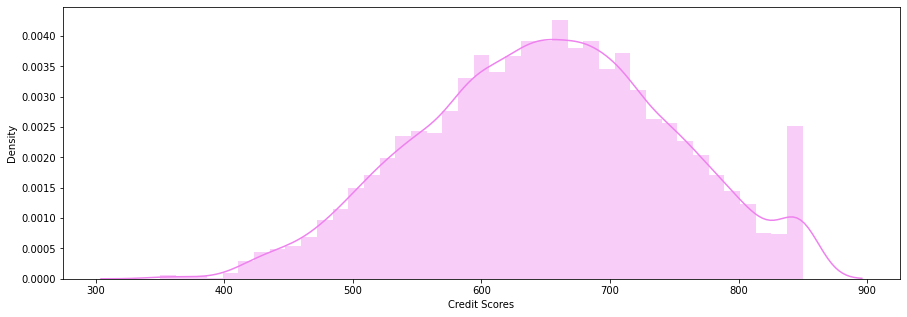

In [14]:
plt.figure(figsize=(15,5))
sns.distplot(x=data["CreditScore"], color="violet", axlabel="Credit Scores")
plt.show()

>#### Here I have divided the Credit score column in 5 parts by using `pd.cut()`. The table below shows the 5 bands and the exiting value mean for those bands.

In [15]:
df['CreditScoreBand'] = pd.cut(df['CreditScore'], 5)
df[['CreditScoreBand', 'Exited']].groupby(['CreditScoreBand'], as_index=False).mean().sort_values(by='CreditScoreBand', ascending=True)

,CreditScoreBand,Exited
0,"(349.5, 450.0]",0.322751
1,"(450.0, 550.0]",0.214385
2,"(550.0, 650.0]",0.207780
3,"(650.0, 750.0]",0.192496
4,"(750.0, 850.0]",0.195870


In [16]:
df_ = [df] #making a list so that 'for loops' can be easily implemented

>#### Here what I have done is that I have replaced each Credit score band with a value (from 0 to 4) so that now only these values will be displayed instead of the actual credit scores in the table. 

In [17]:
for dataset in df_:    
    dataset.loc[(dataset['CreditScore'] > 349.5) & (dataset['CreditScore'] <= 450.0), 'CreditScore'] = 0
    dataset.loc[(dataset['CreditScore'] > 450.0) & (dataset['CreditScore'] <= 550.0), 'CreditScore'] = 1
    dataset.loc[(dataset['CreditScore'] > 550.0) & (dataset['CreditScore'] <= 650.0), 'CreditScore'] = 2
    dataset.loc[(dataset['CreditScore'] > 650.0) & (dataset['CreditScore'] <= 750.0), 'CreditScore'] = 3
    dataset.loc[(dataset['CreditScore'] > 750.0) & (dataset['CreditScore'] <= 850.0), 'CreditScore'] = 4
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreBand
0,1,15634602,Hargrave,2,France,Female,42,2,0.00,1,1,1,101348.88,1,"(550.0, 650.0]"
1,2,15647311,Hill,2,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"(550.0, 650.0]"
2,3,15619304,Onio,1,France,Female,42,8,159660.80,3,1,0,113931.57,1,"(450.0, 550.0]"
3,4,15701354,Boni,3,France,Female,39,1,0.00,2,0,0,93826.63,0,"(650.0, 750.0]"
4,5,15737888,Mitchell,4,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"(750.0, 850.0]"


>#### Now, let's drop the CreditScoreBand column which has now done its purpose.

In [18]:
df = df.drop(['CreditScoreBand'], axis=1)
df_ = [df]

#### Thus, we have replaced the continuous distribution of the Credit scores into 5 discrete values. Similarly we will conduct such modifications on all the continuous features.

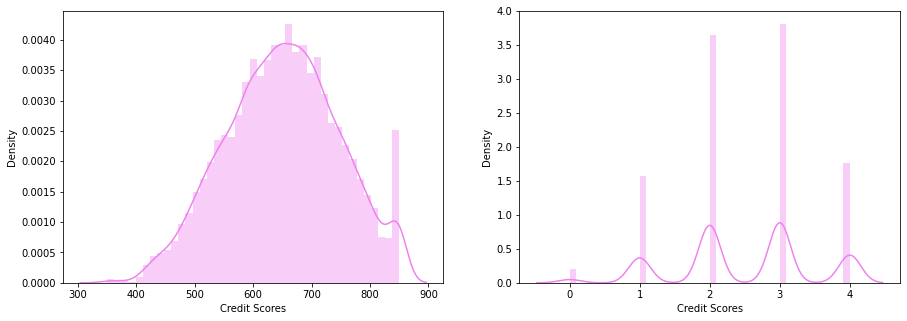

In [19]:
fig, ax = plt.subplots(1, 2)
sns.distplot(x=data["CreditScore"], color="violet", axlabel="Credit Scores", ax=ax[0])
sns.distplot(x=df["CreditScore"], color="violet", axlabel="Credit Scores", ax=ax[1])
fig.set_figheight(5)
fig.set_figwidth(15)
plt.show()

### `Geography`
#### Plot for Geography with Exited:

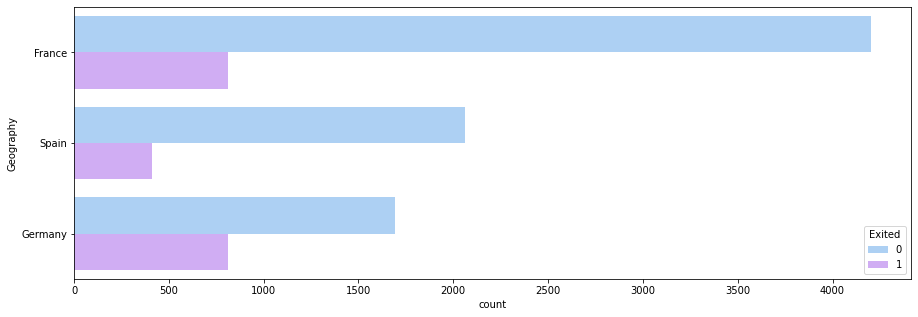

In [20]:
plt.figure(figsize=(15, 5))
sns.countplot(y="Geography", hue="Exited", data=data, palette="cool", alpha=0.55)
plt.show()

#### Here, we can conduct One Hot Encoding and replace the categories: France, Germany and Spain into numbers. But, I went on a more raw approach.

In [21]:
for dataset in df_:
    dataset['Geography'] = dataset['Geography'].map( {'France': 0, 'Germany': 1, 'Spain': 2} ).astype(int)

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,2,0,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,2,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,1,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,3,0,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,4,2,Female,43,2,125510.82,1,1,1,79084.10,0


### `Gender`:
#### Plot for Gender:

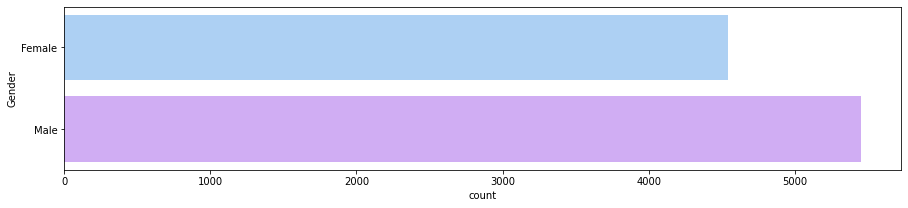

In [22]:
plt.figure(figsize=(15,3))
sns.countplot(y=df['Gender'], orient="v", data=df, palette="cool", alpha=0.55)
plt.show()

#### Exiting rate based on the gender:

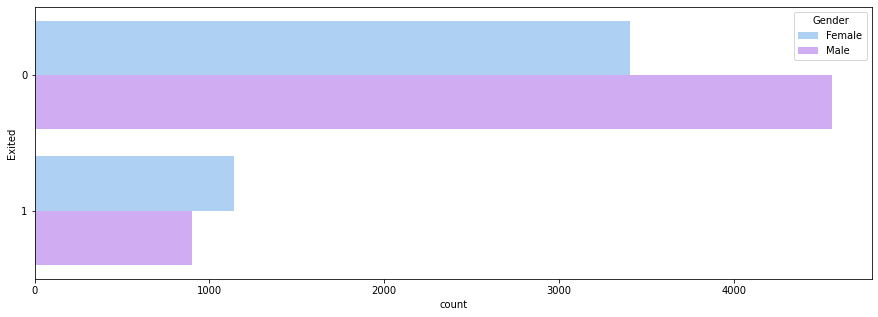

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(y="Exited", hue="Gender", data=data, orient="v", palette="cool", alpha=0.55)
plt.show()

In [24]:
for dataset in df_:
    dataset['Gender'] = dataset['Gender'].map( {'Female': 1, 'Male': 0} ).astype(int)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,2,0,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,2,2,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,1,0,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,3,0,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,4,2,1,43,2,125510.82,1,1,1,79084.10,0


### `Age`:
#### Distribution plot for age of the customers:

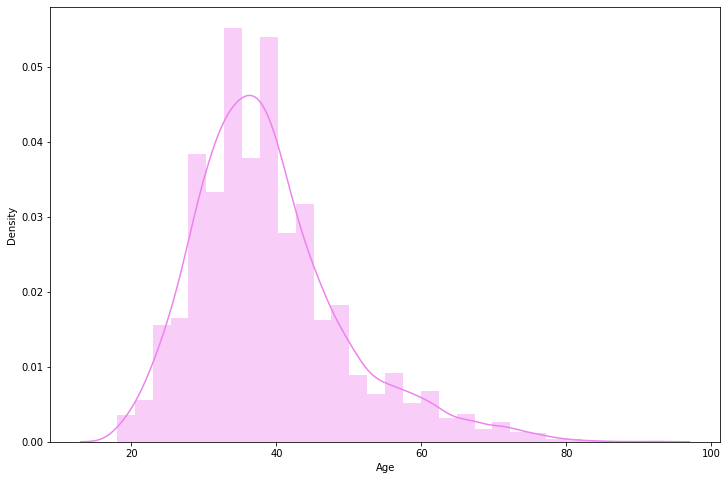

In [25]:
plt.figure(figsize=(12,8))
sns.distplot(x=data["Age"], bins=30, axlabel="Age", color='violet')
plt.show()

In [26]:
df['AgeBand'] = pd.cut(df['Age'], 5)
df[['AgeBand', 'Exited']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Exited
0,"(17.926, 32.8]",0.076344
1,"(32.8, 47.6]",0.188182
2,"(47.6, 62.4]",0.529978
3,"(62.4, 77.2]",0.214925
4,"(77.2, 92.0]",0.041667


In [27]:
for dataset in df_:    
    dataset.loc[(dataset['Age'] > 17.926) & (dataset['Age'] <= 32.8), 'Age'] = 0
    dataset.loc[(dataset['Age'] > 32.8) & (dataset['Age'] <= 47.6), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 47.6) & (dataset['Age'] <= 62.4), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 62.4) & (dataset['Age'] <= 77.2), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 77.2, 'Age'] = 4
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeBand
0,1,15634602,Hargrave,2,0,1,1,2,0.00,1,1,1,101348.88,1,"(32.8, 47.6]"
1,2,15647311,Hill,2,2,1,1,1,83807.86,1,0,1,112542.58,0,"(32.8, 47.6]"
2,3,15619304,Onio,1,0,1,1,8,159660.80,3,1,0,113931.57,1,"(32.8, 47.6]"
3,4,15701354,Boni,3,0,1,1,1,0.00,2,0,0,93826.63,0,"(32.8, 47.6]"
4,5,15737888,Mitchell,4,2,1,1,2,125510.82,1,1,1,79084.10,0,"(32.8, 47.6]"


In [28]:
df = df.drop(['AgeBand'], axis=1)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,2,0,1,1,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,2,2,1,1,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,1,0,1,1,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,3,0,1,1,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,4,2,1,1,2,125510.82,1,1,1,79084.10,0


### `Tenure`:
>#### Tenure has 11 unique values that are just number of years from 0 to 10. Hence, I kept it as it is.

In [29]:
df['Tenure'].nunique()

11

In [30]:
df['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

### `Bank Balance`:
#### Distribution plot for customer bank balance:

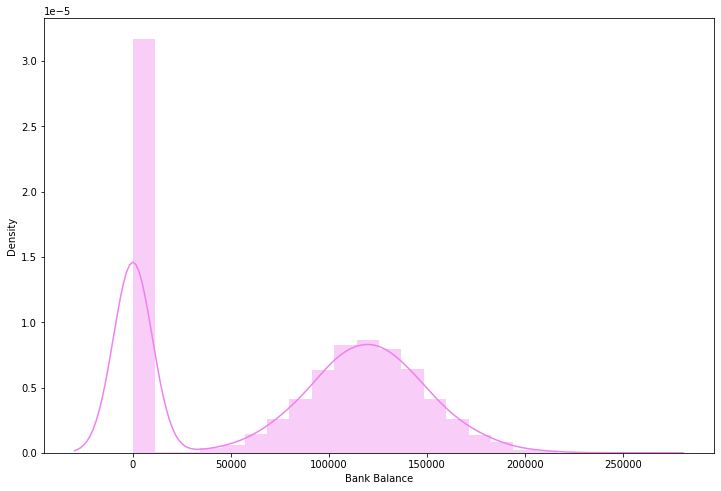

In [31]:
plt.figure(figsize=(12, 8))
sns.distplot(x=data["Balance"], axlabel="Bank Balance", color="violet")
plt.show()

In [32]:
df['BalanceBand'] = pd.cut(df['Balance'], 5)
df[['BalanceBand', 'Exited']].groupby(['BalanceBand'], as_index=False).mean().sort_values(by='BalanceBand', ascending=True)

,BalanceBand,Exited
0,"(-250.898, 50179.618]",0.142470
1,"(50179.618, 100359.236]",0.199609
2,"(100359.236, 150538.854]",0.257837
3,"(150538.854, 200718.472]",0.217486
4,"(200718.472, 250898.09]",0.593750


In [33]:
df_ = [df]

In [34]:
for dataset in df_:    
    dataset.loc[dataset['Balance'] <= 50179.618, 'Balance'] = 0
    dataset.loc[(dataset['Balance'] > 50179.618) & (dataset['Balance'] <= 100359.236), 'Balance'] = 1
    dataset.loc[(dataset['Balance'] > 100359.236) & (dataset['Balance'] <= 150538.854), 'Balance'] = 2
    dataset.loc[(dataset['Balance'] > 150538.854) & (dataset['Balance'] <= 200718.472), 'Balance'] = 3
    dataset.loc[(dataset['Balance'] > 200718.472) & (dataset['Balance'] <=  250898.09), 'Balance'] = 4
    df['Balance'] = df['Balance'].astype(int)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceBand
0,1,15634602,Hargrave,2,0,1,1,2,0,1,1,1,101348.88,1,"(-250.898, 50179.618]"
1,2,15647311,Hill,2,2,1,1,1,1,1,0,1,112542.58,0,"(50179.618, 100359.236]"
2,3,15619304,Onio,1,0,1,1,8,3,3,1,0,113931.57,1,"(150538.854, 200718.472]"
3,4,15701354,Boni,3,0,1,1,1,0,2,0,0,93826.63,0,"(-250.898, 50179.618]"
4,5,15737888,Mitchell,4,2,1,1,2,2,1,1,1,79084.10,0,"(100359.236, 150538.854]"


In [35]:
df = df.drop(['BalanceBand'], axis=1)
df_ = [df]

### `Estimated Salary`:
#### Distribution plot for customer salary:

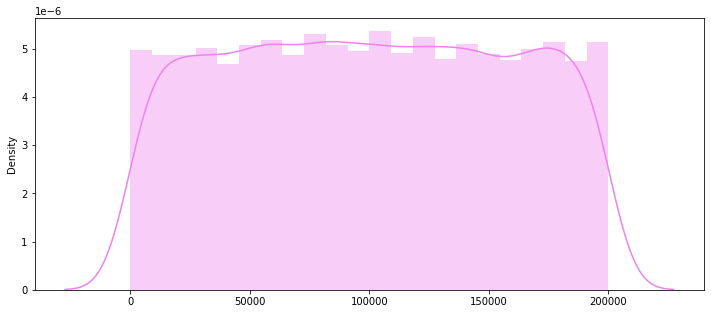

In [36]:
plt.figure(figsize=(12, 5))
sns.distplot(x=data["EstimatedSalary"], color="violet")
plt.show()

In [37]:
df['EstimatedSalaryBand'] = pd.cut(df['EstimatedSalary'], 4)
df[['EstimatedSalaryBand', 'Exited']].groupby(['EstimatedSalaryBand'], as_index=False).mean().sort_values(by='EstimatedSalaryBand', ascending=True)

,EstimatedSalaryBand,Exited
0,"(-188.401, 50006.805]",0.199348
1,"(50006.805, 100002.03]",0.198660
2,"(100002.03, 149997.255]",0.202348
3,"(149997.255, 199992.48]",0.214664


In [38]:
for dataset in df_:    
    dataset.loc[(dataset['EstimatedSalary'] > -188.401) & (dataset['EstimatedSalary'] <= 50006.805), 'EstimatedSalary'] = 0
    dataset.loc[(dataset['EstimatedSalary'] > 50006.805) & (dataset['EstimatedSalary'] <= 100002.03), 'EstimatedSalary'] = 1
    dataset.loc[(dataset['EstimatedSalary'] > 100002.03) & (dataset['EstimatedSalary'] <= 149997.255), 'EstimatedSalary'] = 2
    dataset.loc[(dataset['EstimatedSalary'] > 149997.255) & (dataset['EstimatedSalary'] <= 199992.48), 'EstimatedSalary'] = 3
    df['EstimatedSalary'] = df['EstimatedSalary'].astype(int)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,EstimatedSalaryBand
0,1,15634602,Hargrave,2,0,1,1,2,0,1,1,1,2,1,"(100002.03, 149997.255]"
1,2,15647311,Hill,2,2,1,1,1,1,1,0,1,2,0,"(100002.03, 149997.255]"
2,3,15619304,Onio,1,0,1,1,8,3,3,1,0,2,1,"(100002.03, 149997.255]"
3,4,15701354,Boni,3,0,1,1,1,0,2,0,0,1,0,"(50006.805, 100002.03]"
4,5,15737888,Mitchell,4,2,1,1,2,2,1,1,1,1,0,"(50006.805, 100002.03]"


In [39]:
df = df.drop(['EstimatedSalaryBand'], axis=1)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,2,0,1,1,2,0,1,1,1,2,1
1,2,15647311,Hill,2,2,1,1,1,1,1,0,1,2,0
2,3,15619304,Onio,1,0,1,1,8,3,3,1,0,2,1
3,4,15701354,Boni,3,0,1,1,1,0,2,0,0,1,0
4,5,15737888,Mitchell,4,2,1,1,2,2,1,1,1,1,0


>#### Removing other columns with very little to no information. 

In [40]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,2,0,1,1,2,0,1,1,1,2
1,2,2,1,1,1,1,1,0,1,2
2,1,0,1,1,8,3,3,1,0,2
3,3,0,1,1,1,0,2,0,0,1
4,4,2,1,1,2,2,1,1,1,1


#### Here, we have a modified table with all the values converted into a format that our model can understand. Now, let's get it prepared to pass it into the model.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df, data['Exited'], test_size=0.15, random_state=seed)

# 3. <a id='modeltraining'>Model Training</a>
## 3.1. <a id='lrmodel'>Treating a Logistic Regression model as a base model</a>

In [42]:
LR_model = LogisticRegression(random_state=seed)
LR_model.fit(X_train, y_train)

LogisticRegression(random_state=46)

In [43]:
y_pred = LR_model.predict(X_test)

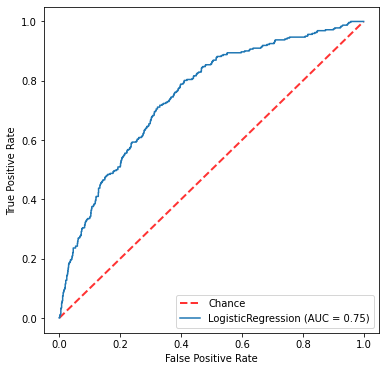

In [44]:
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
fig.set_figheight(6)
fig.set_figwidth(6)
plot_roc_curve(LR_model, X_test, y_test, ax=ax)

## 3.2. <a id='xgboost'>Training on XG-Boost</a>
>#### Calling the XG-Boost model object and setting `tree_method='gpu_hist'` to be able to train the model on the GPU which is much faster than training it normally on CPU.

In [45]:
XGB_model = XGBClassifier(tree_method='gpu_hist')
XGB_model.fit(X_train, y_train)
print('Your model is trained!')

[15:47:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Your model is trained!


Confusion Matrix: 
 [[1102   76]
 [ 182  140]]


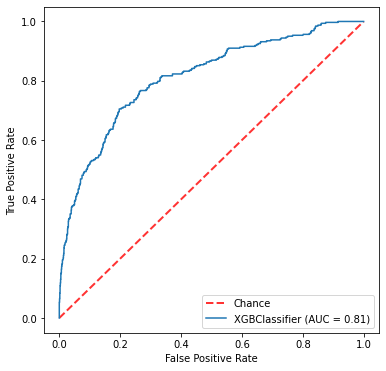

In [46]:
y_pred1 = XGB_model.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred1))
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
fig.set_figheight(6)
fig.set_figwidth(6)
plot_roc_curve(XGB_model, X_test, y_test, ax=ax)

## 3.3. <a id='hyperparam'>HyperParameter Tuning</a>
#### Determining the best hyperparameters using GridSearchCV

>`scale_pos_weight`: Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative instances) / sum(positive instances) ==> already calculated over<a href="#imb"> here.</a>  

>`alpha`: L1 regularization term on weights. Increasing this value will make model more conservative.  

>`max_depth`: Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.  

>`gamma`: Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger `gamma` is, the more conservative the algorithm will be. 

>`subsample`: Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting. 

>`learning_rate`: Step size shrinkage used in update to prevent overfitting. 

>`tree_method`: Basically to train XGBoost on cpu or gpu. Read more over in the <a href="https://xgboost.readthedocs.io/en/latest/gpu/index.html?highlight=tree_method">documentation.</a>

>`eval_metric`: Evaluation metrics for validation data, a default metric will be assigned according to objective. 

>`objective: 'binary:hinge'`: hinge loss for binary classification. This makes predictions of 0 or 1, rather than producing probabilities. *I tried using this but the score went below 72%.*  

>`objective: 'binary:logistic'`: logistic regression for binary classification, output probability.



In [47]:
MAX_TREE_DEPTH = [4]#complex>>>
TREE_METHOD = ['gpu_hist']
SUBSAMPLE = [0.7]
REGULARIZATION = [0.1, 0.01]
GAMMA = [0.2, 0.3]
POS_WEIGHT = [0.26]
OBJ = ['binary:logistic']
EVAL = ['auc']
ETA = [0.11]

param_grid = {'tree_method': TREE_METHOD, 'max_depth': MAX_TREE_DEPTH, 'alpha': REGULARIZATION,
          'gamma': GAMMA, 'subsample': SUBSAMPLE, 'scale_pos_weight': POS_WEIGHT, 'learning_rate': ETA, 
          'objective': OBJ, 'eval_metric': EVAL}

>#### The above parameters are what I found to give the greatest score (by trial and error).

### Introducing Cross Validation:

In [48]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)

In [49]:
%%time
grid = GridSearchCV(estimator=XGB_model, param_grid=param_grid, scoring='roc_auc', cv=cv, n_jobs=-1)
grid_fit = grid.fit(X_train,y_train)

CPU times: user 852 ms, sys: 104 ms, total: 956 ms
Wall time: 26.4 s


>### The training process has been completed!!

# 4. <a id="results">Results</a>
### Thus, I have successfully trained the XG Boost model using cross validation and finally fine tuned the hyperparameters, with the best scores as shown below.

In [50]:
best_score = grid_fit.best_score_
best_params = grid_fit.best_params_

print('Best Score: {:.2f} % with these parameters: {})'.format(best_score*100, best_params))

Best Score: 85.42 % with these parameters: {'alpha': 0.1, 'eval_metric': 'auc', 'gamma': 0.3, 'learning_rate': 0.11, 'max_depth': 4, 'objective': 'binary:logistic', 'scale_pos_weight': 0.26, 'subsample': 0.7, 'tree_method': 'gpu_hist'})


### Other parameters which I tried:
- Best Score: **85.40%** with these parameters: {'alpha': 0.01, 'eval_metric': 'auc', 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 4, 'objective': 'binary:logistic', 'scale_pos_weight': 0.26, 'subsample': 0.5, 'tree_method': 'gpu_hist'}), 
- Best Score: **85.43%** with these parameters: {'alpha': 0.01, 'eval_metric': 'auc', 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'objective': 'binary:logistic', 'scale_pos_weight': 0.26, 'subsample': 0.6, 'tree_method': 'gpu_hist'}),
- Best Score: **85.44%** with these parameters: {'alpha': 0.01, 'eval_metric': 'auc', 'gamma': 0.2, 'learning_rate': 0.11, 'max_depth': 4, 'objective': 'binary:logistic', 'scale_pos_weight': 0.26, 'subsample': 0.7, 'tree_method': 'gpu_hist'}),  
- Best Score: **85.44%** with these parameters: {'alpha': 0.1, 'eval_metric': 'auc', 'gamma': 0.3, 'learning_rate': 0.11, 'max_depth': 4, 'objective': 'binary:logistic', 'scale_pos_weight': 0.26, 'subsample': 0.7, 'tree_method': 'gpu_hist'})


In [51]:
#Passing our final model with the test data
y_pred2 = grid_fit.predict(X_test)

Confusion Matrix: 
 [[1168   10]
 [ 242   80]]


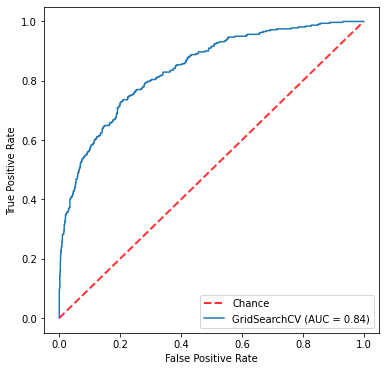

In [52]:
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred2))
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
fig.set_figheight(6)
fig.set_figwidth(6)
plot_roc_curve(grid_fit, X_test, y_test, ax=ax)

ROCs for comparison: Above Training set, Below Testing set


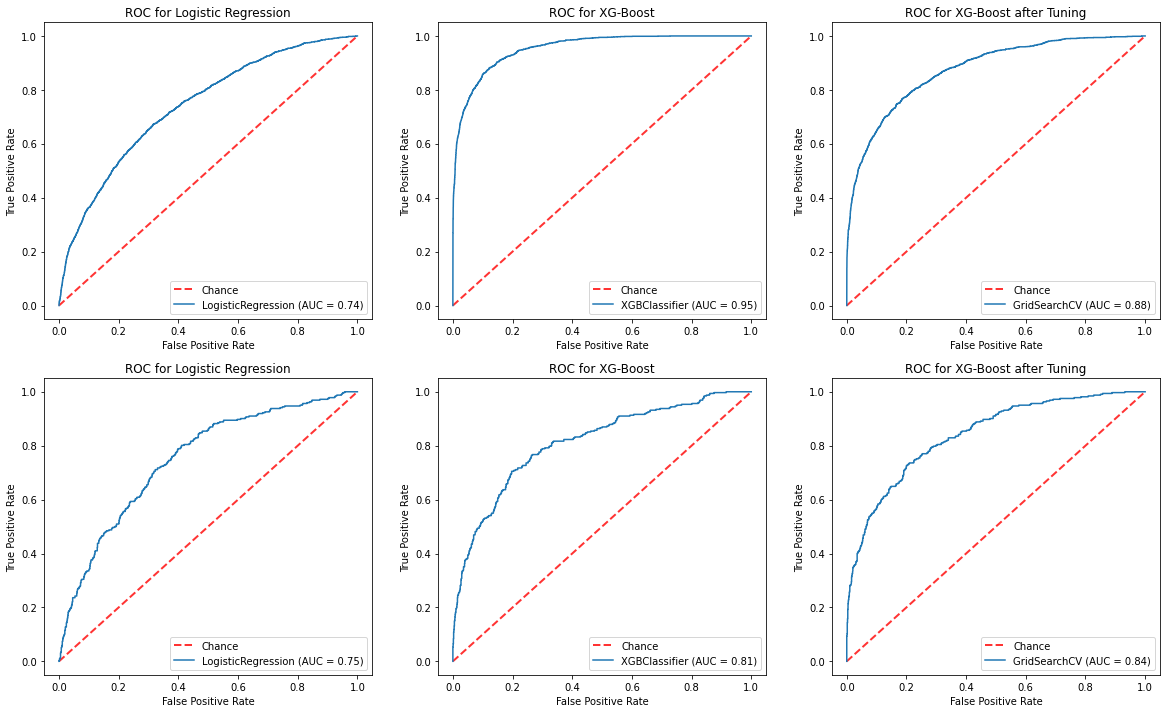

In [53]:
print('ROCs for comparison: Above Training set, Below Testing set')
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(12)
fig.set_figwidth(20)

#ROC curves for Training set

ax1.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
ax1.set_title("ROC for Logistic Regression")
plot_roc_curve(LR_model, X_train, y_train, ax=ax1)

ax2.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
ax2.set_title("ROC for XG-Boost")
plot_roc_curve(XGB_model, X_train, y_train, ax=ax2)

ax3.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
ax3.set_title("ROC for XG-Boost after Tuning")
plot_roc_curve(grid_fit, X_train, y_train, ax=ax3)

#ROC curves for Testing set

ax4.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
ax4.set_title("ROC for Logistic Regression")
plot_roc_curve(LR_model, X_test, y_test, ax=ax4)

ax5.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
ax5.set_title("ROC for XG-Boost")
plot_roc_curve(XGB_model, X_test, y_test, ax=ax5)

ax6.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
ax6.set_title("ROC for XG-Boost after Tuning")
plot_roc_curve(grid_fit, X_test, y_test, ax=ax6)

#### The above three plots give the ROC AUC curve for the training sets and the below three plots for the testing sets. It can be observed that the curve for training set is more smooth as compared to the curves for the testing sets.
#### For the XG-Boost model trained **without** cross validation and hyperparameter tuning, the training AUC score is 0.95 but while testing it falls to 0.81, suggesting that the model must have overfit to the data. 
#### In the third column, the XG-Boost model which used cross validation during training and was hyper tuned, the training score was 0.88 and the testing score was 0.84, suggesting that the model did not overfit to the training data and hence the testing score was the highest among all three models.

### Thus, we can observe that the AUC score improved substantially due to XG-Boost paired with the fine tuning and cross validation.

# Referenced:
[1] https://machinelearningmastery.com/xgboost-for-imbalanced-classification/  
[2] https://xgboost.readthedocs.io/en/latest/parameter.html?highlight=learning%20rate#learning-task-parameters